# VCHE Benchmark Analysis and Graphs For DNS -- 1000 runs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
#Nov 26th commit c0f814662d3aae232da28f868cc069aed8b1484e
# Averaged over 1000 runs -- CLUSTER

# REMOVING PRE_VERIF adding it in Ecd
dns_bench={'Type':"baseline",  'PN':16, 'LogT': 58, 'Lbd': 0,  'Ecd': 3.2884414E+07,         'Enc': 8.92822442E+08  ,'Eval': 2.9299787218E+10  ,'Verif': 0              , 'Dec':1.20734383E+08,  'Dcd': 1.8916827E+07}
dns_V1   ={'Type':"REP"      , 'PN':16, 'LogT': 58, 'Lbd': 64, 'Ecd': 7.157120740E+9,        'Enc': 2.4824827274E+10,'Eval': 1.525967433875E+12,'Verif': 1.560239272E+09, 'Dec':1.23495120E+08,  'Dcd': 4.2603399E+07}
dns_V2   ={'Type':"REP"      , 'PN':16, 'LogT': 58, 'Lbd': 64, 'Ecd': 8.55763798E+08,        'Enc': 1.472984548E+09 ,'Eval': 2.467554414041E+12,'Verif': 2.4303318E+07  , 'Dec':1.3478826369E+10,'Dcd': 7.349294343E+09}
dns_V2RQ ={'Type':"REP RQ"   , 'PN':16, 'LogT': 58, 'Lbd': 64, 'Ecd': 6.40154982E+08,        'Enc': 2.190753734E+09 ,'Eval': 1.17791970123E+11 ,'Verif': 4.932484980E+09 ,'Dec':3.68872925E+8,   'Dcd': 1.73696898E+08}
timings={'Bench':dns_bench, 'REP ':dns_V1, 'PE':dns_V2, 'ReQ': dns_V2RQ}

In [3]:
pd.DataFrame(createDFDiffR(timings))

,,Ecd,Enc,Eval,Dec,Verif,Dcd
Create,REP,7.695996,25.852682,0.000000,0.000000,0.000000,0.000000
Eval.,REP,0.000000,0.000000,51.081178,0.000000,0.000000,0.000000
Verify,REP,0.000000,0.000000,0.000000,0.019769,11.172401,0.169612
Create,PE,0.888920,0.626723,0.000000,0.000000,0.000000,0.000000
Eval.,PE,0.000000,0.000000,83.217486,0.000000,0.000000,0.000000
Verify,PE,0.000000,0.000000,0.000000,95.653249,0.174029,52.490612
Eval.,ReQ,0.000000,0.000000,3.020233,0.000000,0.000000,0.000000
Verify,ReQ,0.000000,0.000000,0.000000,1.776845,35.320030,1.108333


In [4]:
pd.DataFrame(timings)

,Bench,REP,PE,ReQ
Type,baseline,REP,REP,REP RQ
PN,16,16,16,16
LogT,58,58,58,58
Lbd,0,64,64,64
Ecd,32884414.0,7157120740.0,855763798.0,640154982.0
Enc,892822442.0,24824827274.0,1472984548.0,2190753734.0
Eval,29299787218.0,1525967433875.0,2467554414041.0,117791970123.0
Verif,0,1560239272.0,24303318.0,4932484980.0
Dec,120734383.0,123495120.0,13478826369.0,368872925.0
Dcd,18916827.0,42603399.0,7349294343.0,173696898.0


In [5]:
sns.set(font_scale=3)
#color = sns.color_palette("deep", 10) #["green", "Black", "Red", "Yellow", "peru", "Grey", "aqua"]
sns.set_palette(sns.cubehelix_palette(n_colors=7, start=0.8,rot=3,hue=1,gamma=1,dark=0.25,light=0.75))
#sns.set_palette(sns.cubehelix_palette(n_colors=7,start=0.2, rot=1, dark=0.2, light=.80, reverse=True))
sns.set_style("dark", {
   'axes.grid': True,
   'axes.edgecolor': 'none'
})
plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here


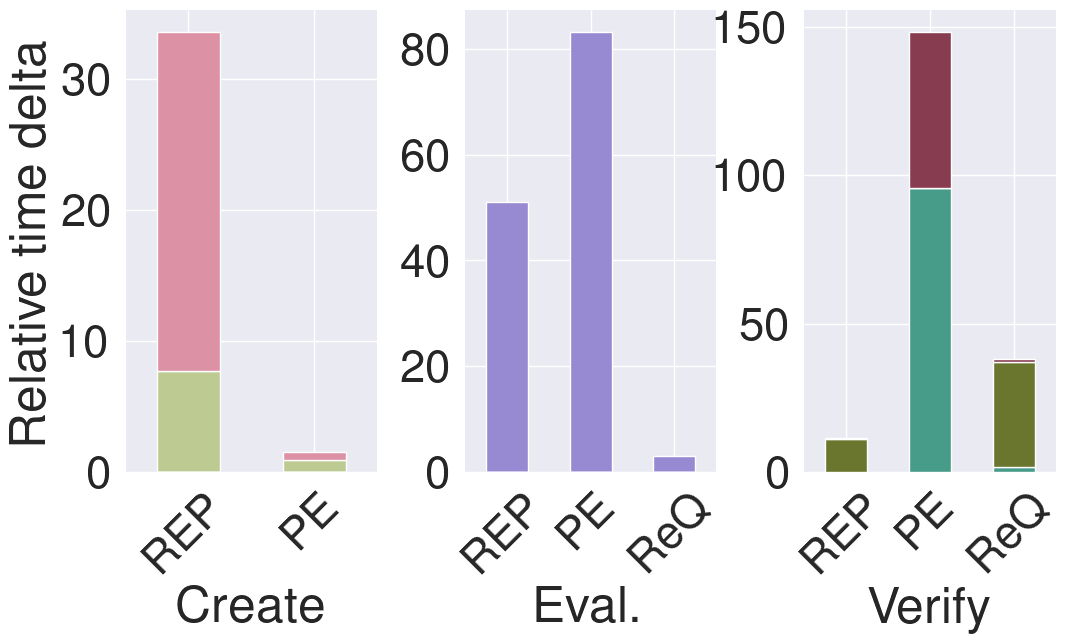

In [6]:
# Plot the barplot Relative DIFFERENCE with the baseline
timings_df = pd.DataFrame(createDFDiffR(timings))

n_subplots = len(timings_df.index.levels[0])
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=False, figsize=(12, 6))  # width, height
axes[0].set_ylabel('Relative time delta')

graph = dict(zip(timings_df.index.levels[0], axes[-n_subplots:]))
plots = list(map(lambda x: plot_function(x, graph[x], timings_df), graph))
fig.subplots_adjust(wspace=0.35)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Figures/barplotDNS1000.pdf', bbox_inches='tight')
plt.show()